## STATS 10 Assignment 3


## Part I

### Exercise 1
Use the applet: https://digitalfirst.bfwpub.com/stats_applet/stats_applet_7_norm.html
1. Set the mean to 0 and the standard deviation to 1. 
2. The numbers on the horizontal axis represent the number of SD above or below the mean. So, 0 is the mean, +1 is one SD above the mean, -1 is one SD below the mean etc.

   a. Place the flags 1 standard deviation on either side of the mean. What is the area between these two values? What does the empirical rule say this area is?

   The applet says the area is 1 - 0.1587*2 = 0.6826. The empirical rule says that the area between these two values should be 68% of the total area under the curve, aka 0.68.


   b. Repeat for 2 and 3 standard deviations on either side of the mean. Again, compare the empirical rule with the area given in the applet.

   At 2 standard deviation: The applet says the area is 1 - 0.0228*2 = 0.9544. The empirical rule says that the area between these two values should be 95% of the total area under the curve, aka 0.95.

   At 3 standard deviation: The applet says the area is 1 - 0.0013*2 = 0.9974. The empirical rule says that the area between these two values should be 99.7% of the total area under the curve, aka 0.997.


   c. Using the applet, how many standard deviations above and below the mean do the quartiles of any normal distribution lie? Use the closest available values (the applet can't hit every value exactly).
   
   Since the quartiles lie at 0.25 and 0.75, placing the flags at +- 0.2511, we get -0.671 and 0.671. This means that the quartiles lie at 0.671 standard deviations above and below the mean.

### Exercise 2
Adult male height (X) follows (approximately) a normal distribution with a mean of 69 inches and a standard deviation of 2.8 inches. Use R to find the answers for the following questions.



In [26]:
# a. What proportion of males are less than 65 inches tall? In other words, what is P(X < 65)?
pnorm(65, mean = 69.1, sd = 2.9, lower.tail = TRUE)
print(paste("The proportion of males that are less than 65 inches tall is ", pnorm(65, mean = 69.1, sd = 2.9, lower.tail = TRUE)))


# b. What proportion of males are more than 75 inches tall? In other words, what is P(X > 75)?
pnorm(75, mean = 69.1, sd = 2.9, lower.tail = FALSE)
print(paste0("The proportion of males that are more than 75 inches tall is ", pnorm(75, mean = 69.1, sd = 2.9, lower.tail = FALSE)))


# c. What proportion of males are between 66 and 72 inches tall? In other words, what is P(66 < X < 72)?
pnorm(72, mean = 69.1, sd = 2.9, lower.tail = TRUE) - pnorm(66, mean = 69.1, sd = 2.9, lower.tail = TRUE)
print(paste0("The proportion of males that are between 66 and 72 inches tall is ", pnorm(72, mean = 69.1, sd = 2.9, lower.tail = TRUE) - pnorm(66, mean = 69.1, sd = 2.9, lower.tail = TRUE)))


[1] 0.07871133

[1] "The proportion of males that are less than 65 inches tall is  0.0787113295447905"


[1] 0.02095147

[1] "The proportion of males that are more than 75 inches tall is 0.0209514726129976"


[1] 0.6988021

[1] "The proportion of males that are between 66 and 72 inches tall is 0.698802142229727"


### Exercise 3

Suppose adult male height follows a normal distribution with a mean of 69 inches and a standard
deviation of 2.8 inches. Use R to find the answers for the following questions

In [28]:
mean = 69
std = 2.8
# a. How tall must a male be in order to be among the shortest 0.5% of males?
z = qnorm(0.005)
x = mean + z * std
print(paste0("A male must be ", x, " inches tall"))
# b. How tall must a male be in order to be among the tallest 0.25% of males?
z = qnorm(0.9975)
x = mean + z * std
print(paste0("A male must be " , x, " inches tall"))

[1] "A male must be 61.7876779500631 inches tall"
[1] "A male must be 76.8596945513627 inches tall"


### Exercise 4

[1] 0.2928

[1] 0.07951963

[1] "Mean:  0.2928 SD:  0.0795196344379804"
[1] "Yes, the distribution appears to be approximately normal. It has one mode and is symmetric."


[1] 0.2920518

[1] "Mean:  0.292051756007394 SD:  0.0830175740070321"


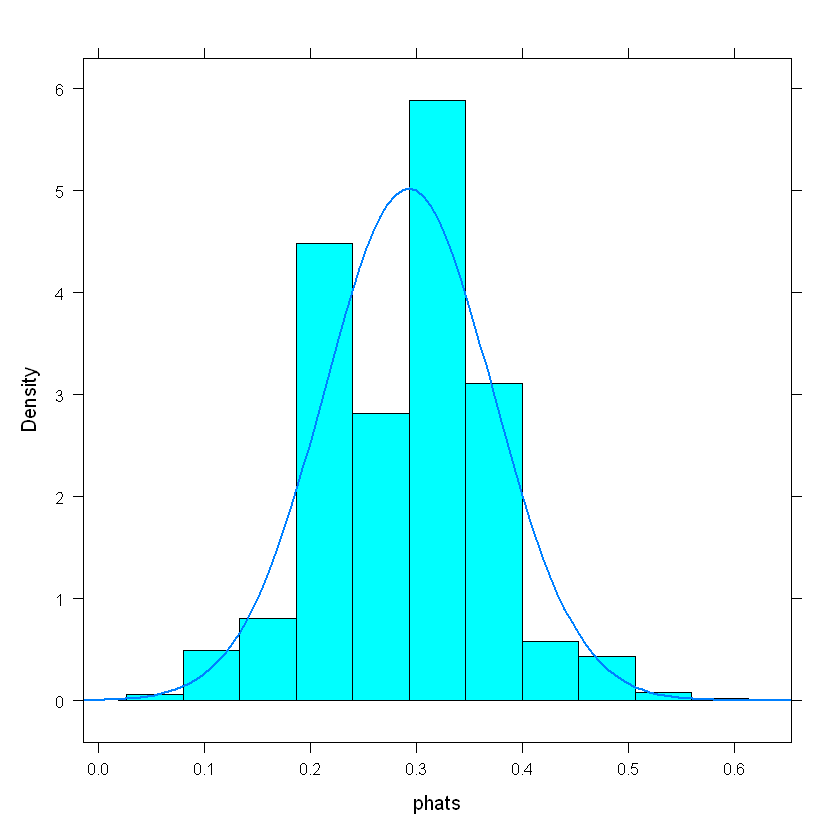

In [17]:
# a. Run the entire chunk of code in the lab 4 section 3 to run a “for loop” that creates a vector of
# sample proportions. Using the results, create a relative frequency histogram of the sampling
# distribution of sample proportions.
# Superimpose a normal curve to your histogram with following instructions:
# • If you use the histogram() function from the mosaic package, add the argument: fit =
# "normal".
# • If you use the hist() function from base R, add the argument: prob = TRUE, then run the
# command: curve(dnorm(x, mean(phats), sd(phats)), add = TRUE).
# b. What is the mean and standard deviation of the simulated sample proportions?
# c. Do you think the simulated distribution of sample proportions is approximately normal?
# Explain why or why not.
# d. Using the theory-based method (i.e., normal approximation by invoking the Central Limit
# Theorem), what would you predict the mean and standard deviation of the sampling distribution
# of sample proportions to be? How close are these predictions to your answers from Part b?
pawnee <- read.csv("pawnee.csv")

n <- 30 # The sample size
N <- 541 # The population size
M <- 1000 # Number of samples/repetitions
# Create vectors to store the simulated proportions from each repetition.
phats <- numeric(M) # for sample proportions
# Set the seed for reproduceability
set.seed(123)
# Always set the seed OUTSIDE the for loop.
# Now we start the loop. Let i cycle over the numbers 1 to 1000 (i.e.,iterate 1000 times).
for(i in seq_len(M)){
    # The i-th iteration of the for loop represents a single repetition.
    # Take a simple random sample of size n from the population of size N.
    index <- sample(N, size = n)
    # Save the random sample in the sample_i vector.
    sample_i <- pawnee[index, ]
    # Compute the proportion of the i-th sample of households with a new health issue.
    phats[i] <- mean(sample_i$New_hlth_issue == "Y")
}

library(mosaic)
histogram(~ phats, fit = "normal")

# b.
mean(phats)
sd(phats)
print(paste("Mean: ", mean(phats), "SD: ", sd(phats)))

# c. 
print("Yes, the distribution appears to be approximately normal. It has one mode and is symmetric.")

# d.
# use theory-based method
mean(pawnee$New_hlth_issue == "Y")
print(paste("Mean: ", mean(pawnee$New_hlth_issue == "Y"), "SD: ", sqrt((mean(pawnee$New_hlth_issue == "Y") * (1 - mean(pawnee$New_hlth_issue == "Y"))) / n)))

print("The empirical mean and standard deviation are very close to the theoretical mean and standard deviation.")

## Part II

### Exercise 1
According to a statistical journal, the average length of a newborn baby is 19.2 inches with a standard deviation of 0.7 inches. The distribution of lengths is approximately normal. Use your knowledge about normal distribution to answer questions below. (Round to four decimal places as needed).

a. What is the probability that a newborn baby will have a length of 18 inches or less? Shade the area of the graph that represents the probability and find the corresponding value.

z = (18 - 19.2) / 0.7 = -1.71

P(z < -1.71) = 0.0436



![Img](https://i.imgur.com/7QzHPl9.png)


b. What percentage of newborn babies will be longer than 20 inches? Shade the area of the graph that represents the probability and find the corresponding value.

z = (20 - 19.2) / 0.7 = 1.14

P(z > 1.14) = 0.1271

![Img](https://i.imgur.com/UnYGAGO.png)



c. Baby clothes are sold in a newborn size that fits infants who are between 18 and 20.4 inches long. What percentage of newborn babies will NOT fit into the "newborn" size either because they are too long or too short?

z_18 = (18 - 19.2) / 0.7 = -1.71

z_20.4 = (20.4 - 19.2) / 0.7 = 1.71

P(z < -1.71) + P(z > 1.71) = 0.0436 + 0.0436 = 0.0872

![Img](https://i.imgur.com/hvdeXxP.png)

Therefore, 8.72% of newborn babies will NOT fit into the "newborn" size either because they are too long or too short.

### Exercise 2
A school gives an entry exam for admission. Suppose the score of this exam follows a normal distribution N(400, 60). This year, the school decides to admit students who score in the top 30%. Suppose a student scored 428 on the test. Will the student be admitted? Explain your reasoning.

z = (428 - 400) / 60 = 0.467

P(z > 0.467) = 0.3192

Since 31.92% of students scored higher than 428, the student is not in the top 30% and will not be admitted.

### Exercise 3

According to a newspaper, 58% of high school seniors have a driver's license. Suppose we take a random sample of 100 high school seniors and find the proportion who have a driver's license.


a. What value should we expect for our sample proportion?

We expect 58% of the students in the sample to have their driver's license.


b. What is the standard error of the sample statistic?

SE = sqrt(0.58 * 0.42 / 100) = 0.049

c. We expect 58% of the students in the sample to have their driver's license, give or take 4.93% 


d. Suppose we increased the sample size from 100 to 700. What effect would this have on the
standard error? Recalculate the standard error to see if your prediction was correct.

SE = sqrt(0.58 * 0.42 / 700) = 0.022    



### Exercise 4
According to a survey, 58% of young Americans aged 18 to 29 say the primary way they watch television is through streaming services on the Internet. Suppose a random sample of 300 Americans from this age group is selected.

a. What percentage of the sample would we expect to watch television primarily through streaming services?

We expect 58% of the students in the sample to watch television primarily through streaming services.

b. Verify that the conditions for the Central Limit Theorem are met. And find the sampling distribution of the sample proportion.

The conditions for the Central Limit Theorem are met. Sample size is large enough (n = 300), and the sample is random, and population is at least 10 times larger than the sample(>3000).


c. Would it be surprising to find that 181 people in the sample watched television primarily through streaming services? Why or why not?

mean = 0.58
SE = sqrt(0.58 * 0.42 / 300) = 0.030

Since 181 is ~0.6 standard deviations above the mean, it would not be surprising to find that 181 people in the sample watched television primarily through streaming services.


d. What is the probability of more than 65% of the sample watched television primarily through streaming services?

z = (0.65 - 0.58) / 0.030 = 2.33

P(z > 2.33) = 0.0099

Therefore, the probability of more than 65% of the sample watched television primarily through streaming services is 0.010.





### Exercise 5
A survey of 800 randomly selected adults in a certain country found that 82% believed that protecting the rights of those with unpopular views is a very important component of a strong democracy.


a. Verify the Central Limit Theorem conditions.

Conditions for the Central Limit Theorem are met. Sample size is large enough (n = 800), and the sample is random, and population is at least 10 times larger than the sample(>8000).


b. Find a 95% confidence interval for the proportion of adults in the country who believe that
protecting the rights of those with unpopular views is a very important component of a strong
democracy.

SE = sqrt(0.82 * 0.18 / 800) = 0.014

z = 1.96

ME = 1.96 * 0.014 = 0.027

Therefore the interval is (0.793, 0.847)


c. Would a 90% confidence interval based on this sample be wider or narrower than the 95% interval? Give a reason for your answer.

A 90% confidence interval would be wider than the 95% interval. Since the confidence interval is wider, the margin of error is larger. which means that the confidence interval is less precise.
